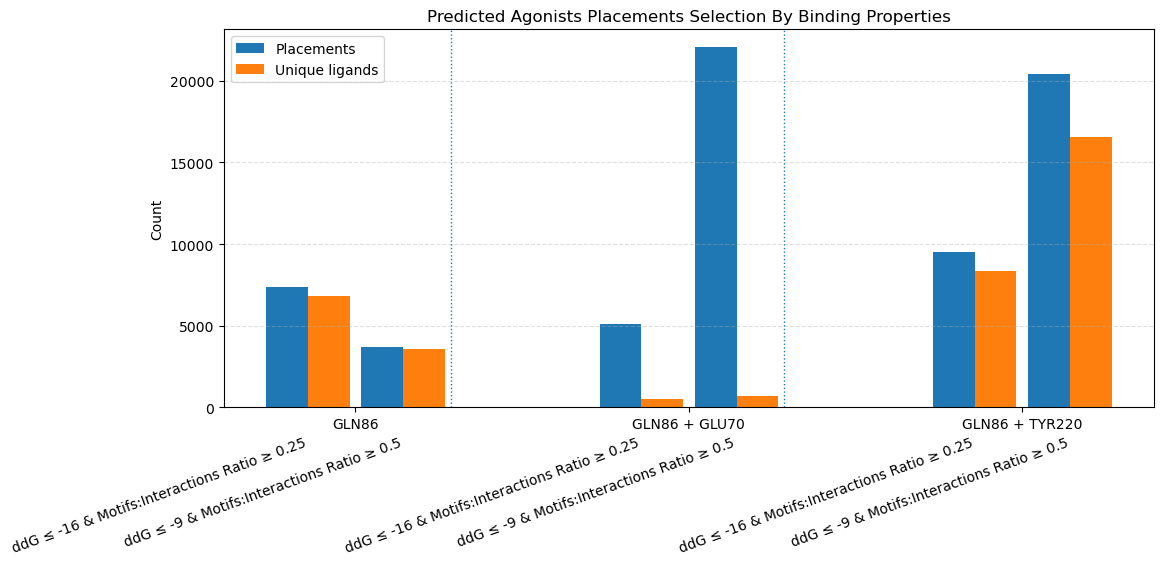

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- Build tidy dataframe ----
data = [
    ("GLN86", "ddG ≤ -16 & Motifs:Interactions Ratio ≥ 0.25", "Placements", 7382),
    ("GLN86", "ddG ≤ -16 & Motifs:Interactions Ratio ≥ 0.25", "Unique ligands", 6837),
    ("GLN86", "ddG ≤ -9 & Motifs:Interactions Ratio ≥ 0.5",  "Placements", 3726),
    ("GLN86", "ddG ≤ -9 & Motifs:Interactions Ratio ≥ 0.5",  "Unique ligands", 3572),

    ("GLN86 + GLU70", "ddG ≤ -16 & Motifs:Interactions Ratio ≥ 0.25", "Placements", 5125),
    ("GLN86 + GLU70", "ddG ≤ -16 & Motifs:Interactions Ratio ≥ 0.25", "Unique ligands", 530),
    ("GLN86 + GLU70", "ddG ≤ -9 & Motifs:Interactions Ratio ≥ 0.5",  "Placements", 22048),
    ("GLN86 + GLU70", "ddG ≤ -9 & Motifs:Interactions Ratio ≥ 0.5",  "Unique ligands", 698),

    ("GLN86 + TYR220", "ddG ≤ -16 & Motifs:Interactions Ratio ≥ 0.25", "Placements", 9519),
    ("GLN86 + TYR220", "ddG ≤ -16 & Motifs:Interactions Ratio ≥ 0.25", "Unique ligands", 8347),
    ("GLN86 + TYR220", "ddG ≤ -9 & Motifs:Interactions Ratio ≥ 0.5",  "Placements", 20424),
    ("GLN86 + TYR220", "ddG ≤ -9 & Motifs:Interactions Ratio ≥ 0.5",  "Unique ligands", 16546),
]

df = pd.DataFrame(data, columns=["Group", "Condition", "Metric", "Count"])

# ---- Plot parameters ----
main_groups   = ["GLN86", "GLN86 + GLU70", "GLN86 + TYR220"]
conditions    = ["ddG ≤ -16 & Motifs:Interactions Ratio ≥ 0.25",
                 "ddG ≤ -9 & Motifs:Interactions Ratio ≥ 0.5"]
metrics       = ["Placements", "Unique ligands"]

bar_width = 0.35
gap_within_main = 0.8
gap_between_main = 1.2

# ---- Compute positions ----
centers = []
group_centers = []
x = 0.0
for g in main_groups:
    c_positions = []
    for c in conditions:
        centers.append(x)
        c_positions.append(x)
        x += gap_within_main
    group_centers.append(np.mean(c_positions))
    x += gap_between_main

centers_np = np.array(centers)

# Helper function to pull values
def values_for(metric):
    vals = []
    for g in main_groups:
        for c in conditions:
            vals.append(
                df[(df["Group"]==g) & (df["Condition"]==c) & (df["Metric"]==metric)]["Count"].iloc[0]
            )
    return np.array(vals, dtype=float)

y_place = values_for("Placements")
y_ligs  = values_for("Unique ligands")

# ---- Plot ----
fig, ax = plt.subplots(figsize=(12, 6))

# tightest pairs (placements vs unique ligands)
ax.bar(centers_np - bar_width/2, y_place, bar_width, label="Placements")
ax.bar(centers_np + bar_width/2, y_ligs,  bar_width, label="Unique ligands")

# Major x ticks (main groups)
ax.set_xticks(group_centers)
ax.set_xticklabels(main_groups)

# Minor ticks (conditions under each main group)
minor_positions = centers_np
minor_labels = [conditions[i % 2] for i in range(len(centers_np))]
ax.set_xticks(minor_positions, minor=True)
ax.set_xticklabels(minor_labels, minor=True, rotation=20, ha="right")
ax.tick_params(axis="x", which="minor", pad=20, length=0)

# Labels, title, legend
ax.set_ylabel("Count")
ax.set_title("Predicted Agonists Placements Selection By Binding Properties")
ax.legend()

# Optional: vertical separators for readability
for i in range(1, len(main_groups)):
    sep = (group_centers[i-1] + group_centers[i]) / 2
    ax.axvline(sep - (gap_between_main/2), linestyle=":", linewidth=1)

ax.grid(axis="y", linestyle="--", alpha=0.4)
plt.subplots_adjust(bottom=0.25)
plt.show()


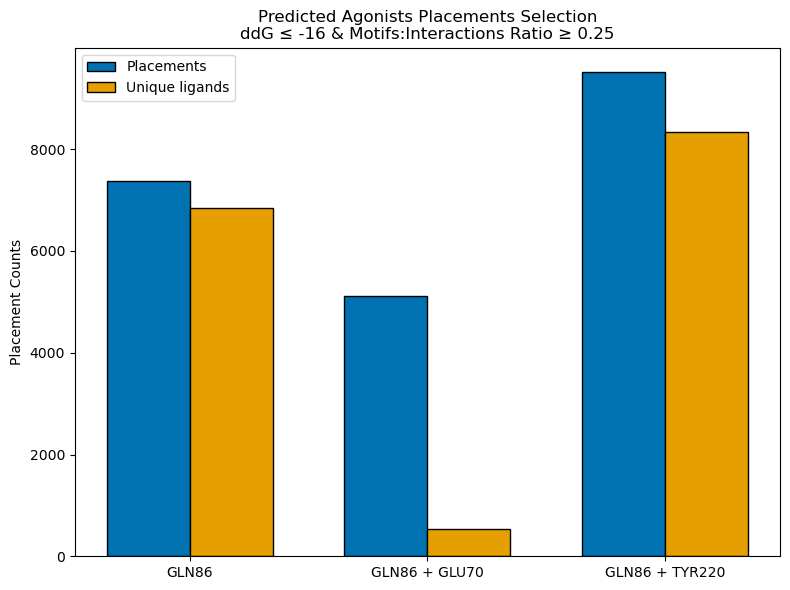

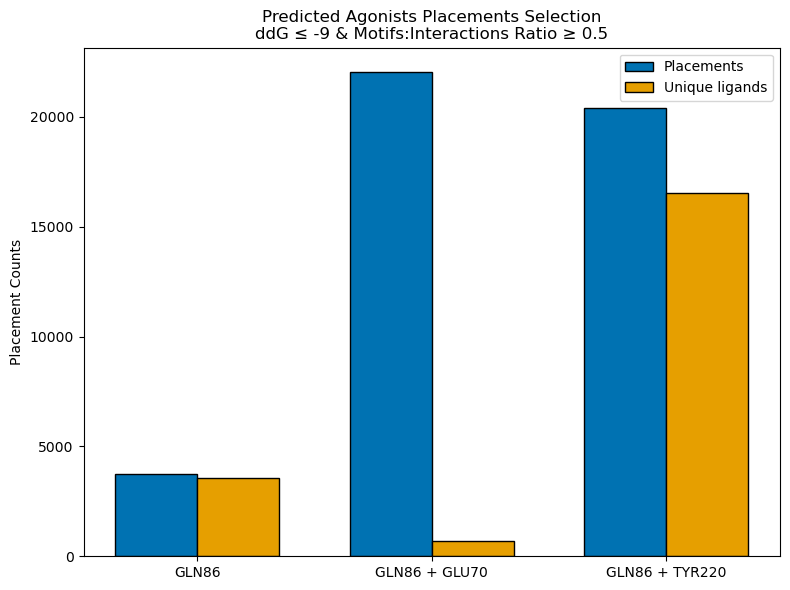

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---- Data ----
data = [
    ("GLN86", "ddG ≤ -16 & Motifs:Interactions Ratio ≥ 0.25", "Placements", 7382),
    ("GLN86", "ddG ≤ -16 & Motifs:Interactions Ratio ≥ 0.25", "Unique ligands", 6837),
    ("GLN86", "ddG ≤ -9 & Motifs:Interactions Ratio ≥ 0.5",  "Placements", 3726),
    ("GLN86", "ddG ≤ -9 & Motifs:Interactions Ratio ≥ 0.5",  "Unique ligands", 3572),

    ("GLN86 + GLU70", "ddG ≤ -16 & Motifs:Interactions Ratio ≥ 0.25", "Placements", 5125),
    ("GLN86 + GLU70", "ddG ≤ -16 & Motifs:Interactions Ratio ≥ 0.25", "Unique ligands", 530),
    ("GLN86 + GLU70", "ddG ≤ -9 & Motifs:Interactions Ratio ≥ 0.5",  "Placements", 22048),
    ("GLN86 + GLU70", "ddG ≤ -9 & Motifs:Interactions Ratio ≥ 0.5",  "Unique ligands", 698),

    ("GLN86 + TYR220", "ddG ≤ -16 & Motifs:Interactions Ratio ≥ 0.25", "Placements", 9519),
    ("GLN86 + TYR220", "ddG ≤ -16 & Motifs:Interactions Ratio ≥ 0.25", "Unique ligands", 8347),
    ("GLN86 + TYR220", "ddG ≤ -9 & Motifs:Interactions Ratio ≥ 0.5",  "Placements", 20424),
    ("GLN86 + TYR220", "ddG ≤ -9 & Motifs:Interactions Ratio ≥ 0.5",  "Unique ligands", 16546),
]

df = pd.DataFrame(data, columns=["Group", "Condition", "Metric", "Count"])

# ---- Parameters ----
main_groups = ["GLN86", "GLN86 + GLU70", "GLN86 + TYR220"]
metrics = ["Placements", "Unique ligands"]
bar_width = 0.35

# ---- Plot each condition separately ----
for cond, subdf in df.groupby("Condition"):
    fig, ax = plt.subplots(figsize=(8,6))

    x = np.arange(len(main_groups))

    # Extract values
    vals_place = [subdf[(subdf["Group"]==g) & (subdf["Metric"]=="Placements")]["Count"].values[0]
                  for g in main_groups]
    vals_ligs = [subdf[(subdf["Group"]==g) & (subdf["Metric"]=="Unique ligands")]["Count"].values[0]
                 for g in main_groups]

    # Bars
    ax.bar(x - bar_width/2, vals_place, bar_width, label="Placements", edgecolor='black', color="#0072B2")
    ax.bar(x + bar_width/2, vals_ligs, bar_width, label="Unique ligands", edgecolor='black', color="#E69F00")

    # Labels
    ax.set_xticks(x)
    ax.set_xticklabels(main_groups, rotation=0)
#    ax.set_xticklabels(main_groups, rotation=15)
    ax.set_ylabel("Placement Counts")
    ax.set_title(f"Predicted Agonists Placements Selection\n{cond}")
    ax.legend()

    plt.tight_layout()
    plt.show()


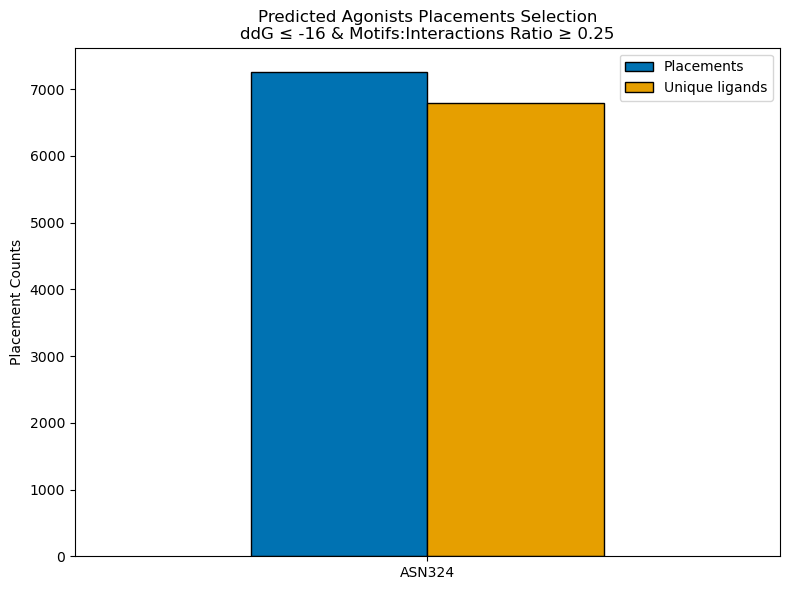

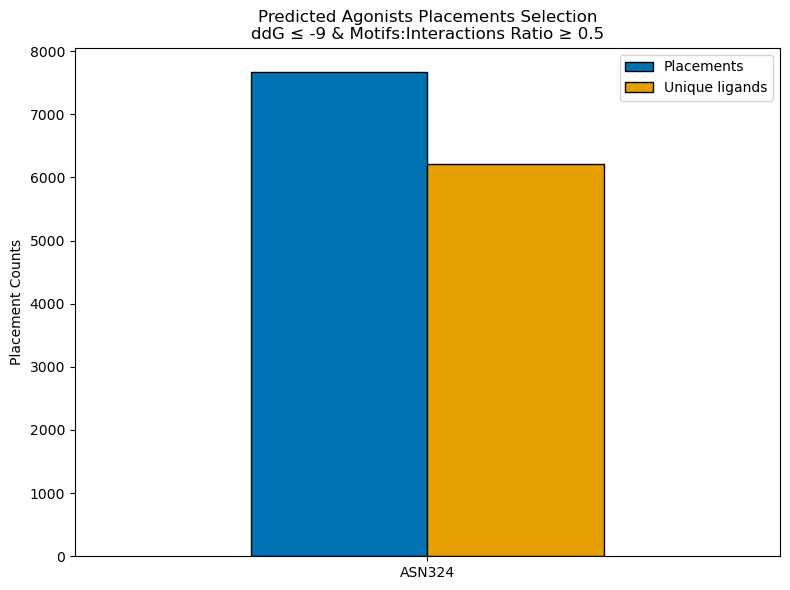

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---- Data ----
data = [
    ("ASN324", "ddG ≤ -16 & Motifs:Interactions Ratio ≥ 0.25", "Placements", 7257),
    ("ASN324", "ddG ≤ -16 & Motifs:Interactions Ratio ≥ 0.25", "Unique ligands", 6792),
    ("ASN324", "ddG ≤ -9 & Motifs:Interactions Ratio ≥ 0.5",  "Placements", 7669),
    ("ASN324", "ddG ≤ -9 & Motifs:Interactions Ratio ≥ 0.5",  "Unique ligands", 6207),

]

df = pd.DataFrame(data, columns=["Group", "Condition", "Metric", "Count"])

# ---- Parameters ----
main_groups = ["ASN324"]
metrics = ["Placements", "Unique ligands"]
bar_width = 0.35
#bar_width = 0.1

# ---- Plot each condition separately ----
for cond, subdf in df.groupby("Condition"):
    fig, ax = plt.subplots(figsize=(8,6))

    x = np.arange(len(main_groups))

    # Extract values
    vals_place = [subdf[(subdf["Group"]==g) & (subdf["Metric"]=="Placements")]["Count"].values[0]
                  for g in main_groups]
    vals_ligs = [subdf[(subdf["Group"]==g) & (subdf["Metric"]=="Unique ligands")]["Count"].values[0]
                 for g in main_groups]

    # Bars
    ax.bar(x - bar_width/2, vals_place, bar_width, label="Placements", edgecolor='black', color="#0072B2")
    ax.bar(x + bar_width/2, vals_ligs, bar_width, label="Unique ligands", edgecolor='black', color="#E69F00")

    ax.set_xlim(-0.7, 0.7)
    
    # Labels
    ax.set_xticks(x)
    ax.set_xticklabels(main_groups, rotation=0)
#    ax.set_xticklabels(main_groups, rotation=15)
    ax.set_ylabel("Placement Counts")
    ax.set_title(f"Predicted Agonists Placements Selection\n{cond}")
    ax.legend()

    plt.tight_layout()
    plt.show()
